# Draw figures changing $N$ and $M$

$$
N \leq \frac{M}{\left(1 + \frac{\sigma^2_P}{\mu_R^2\sigma_C^2}\right)\left(1 + \frac{\sigma^2_Y}{\mu_Y^2} 
+ \frac{\sigma^2_Y\mu_C^2}{\sigma^2_C\mu_Y^2} + \frac{2M\sigma^2_H\mu_R^2}{\sigma^2_C\mu_Y^2}\right)},
$$
and
$$
N \geq M \left(1 + \frac{\sigma^2_P}{\mu_R^2\sigma_C^2}\right)\left(1 + \frac{\sigma^2_Y}{\mu_Y^2} 
+ \frac{\sigma^2_Y\mu_C^2}{\sigma^2_C\mu_Y^2} + \frac{2M\sigma^2_H\mu_R^2}{\sigma^2_C\mu_Y^2}\right).
$$

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
import sys
sys.path.append('../src')
from utils import N1, N2, sample

In [48]:
# only sigY

M_span = np.arange(1,46,1)
N1_span = N1(M_span,0,0.15,0)
N2_span = N2(M_span,0,0.15,0)

In [50]:
M_span1 = range(4,46,4)
N_span = range(4,80,4)
NU = np.zeros((len(M_span1), len(N_span), 20))
for iM in range(len(M_span1)):
    for iN in range(len(N_span)):
        for i in range(20):
            NU[iM, iN, i], _ = sample(N_span[iN], M_span1[iM], 0,0.15,0)

FU = np.mean((NU > 0).astype(float), -1)

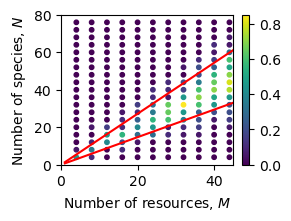

In [51]:
plt.figure(figsize=(2.8, 2.1), constrained_layout=True)
plt.plot(M_span, N1_span, 'r')
plt.plot(M_span, N2_span, 'r')
plt.scatter(np.array(M_span1) * np.ones((len(N_span),1)), np.array(N_span).reshape(-1, 1) * np.ones((1,len(M_span1))), c = FU.T, s = 10)
plt.colorbar()
#plt.plot(M_span, M_span, 'k--')
plt.xlim(0,45)
plt.ylim(0,80)
plt.xlabel('$M$')
plt.ylabel('$N$')
plt.xlabel('Number of resources, $M$')
plt.ylabel('Number of species, $N$')
plt.savefig('../figures/fig2-test11-1.pdf')

In [56]:
# sigY and sigH

M_span = np.arange(1,46,1)
N1_span = N1(M_span,0,0.15,0.1)
N2_span = N2(M_span,0,0.15,0.1)

In [57]:
NU = np.zeros((len(M_span1), len(N_span), 20))
for iM in range(len(M_span1)):
    for iN in range(len(N_span)):
        for i in range(20):
            NU[iM, iN, i], _ = sample(N_span[iN], M_span1[iM], 0,0.15,0.1)

FU = np.mean((NU > 0).astype(float), -1)

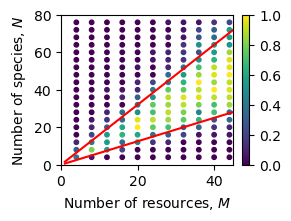

In [58]:
plt.figure(figsize=(2.8, 2.1), constrained_layout=True)
plt.plot(M_span, N1_span, 'r')
plt.plot(M_span, N2_span, 'r')
plt.scatter(np.array(M_span1) * np.ones((len(N_span),1)), np.array(N_span).reshape(-1, 1) * np.ones((1,len(M_span1))), c = FU.T, s = 10)
plt.colorbar()
#plt.plot(M_span, M_span, 'k--')
plt.xlim(0,45)
plt.ylim(0,80)
plt.xlabel('Number of resources, $M$')
plt.ylabel('Number of species, $N$')
plt.savefig('../figures/fig2-test11-2.pdf')